In [4]:
pip install selenium


  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/c9/33/b9da8be5b122b8c3c82c35f515ba0a84a9af3ba9629ae9fd5bbba820d592/selenium-4.23.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/1c/70/efa56ce2271c44a7f4f43533a0477e6854a0948e9f7b76491de1fd3be7c9/trio-0.26.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing_extensions~=4.9 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for websocket-client~=1.8 from https://files.pythonhosted.org/packages/5a/84/44687a29792a70e111c5c477230a72c4b957d88d16

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.7 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.3.1 which is incompatible.
spyder 5.4.3 requires jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0 which is incompatible.


In [10]:
pip install webdriver-manager



  Obtaining dependency information for webdriver-manager from https://files.pythonhosted.org/packages/b5/b5/3bd0b038d80950ec13e6a2c8d03ed8354867dc60064b172f2f4ffac8afbe/webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata


In [12]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------------- -------------- 194.6/300.2 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
import re

In [26]:
driver=webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [27]:
# create dictionary for dataframe
jobs={"job_no":[],
    "roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
      "salaries":[],
     "skills":[]}

In [23]:
type(jobs)


dict

In [30]:

# link of website you want to scrape
for i in range(20):
    driver.get(f"https://www.naukri.com/data-scientist-jobs-{i}")
    time.sleep(3)
    lst = driver.find_elements(By.CLASS_NAME, "srp-jobtuple-wrapper")
    
    # scrape the data from the website
    for index, job in enumerate(lst):
        jobno = (i * len(lst) + index + 1)
        
        # Initialize variables to None
        role = company = location = exp = salary = skill = None  
        
        # scrape data from class_name
        role = job.find_element(By.CLASS_NAME, "title").text
        company = job.find_element(By.CLASS_NAME, "comp-name").text
        
        # Use try-except to handle missing location
        try:
            location = job.find_element(By.CLASS_NAME, "loc-wrap").text
        except NoSuchElementException:
            location = "NA"  # Assign "NA" if location is missing

        # Similarly handle other fields that might be missing
        try:
            exp = job.find_element(By.CLASS_NAME, "exp-wrap").text
        except NoSuchElementException:
            exp = "NA"

        try:
            salary = job.find_element(By.CLASS_NAME, "sal-wrap").text
        except NoSuchElementException:
            salary = "NA"
    
        try:
            skill_ul = job.find_element(By.CLASS_NAME, "tags-gt")
            skill_li = skill_ul.find_elements(By.TAG_NAME, "li")
            skill_tag = [li.text for li in skill_li]
            skill = ','.join(skill_tag)
        except NoSuchElementException:
            skill = "NA"
        
        # Append data to your list or dataframe
        jobs["job_no"].append(jobno)
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["salaries"].append(salary)
        jobs["skills"].append(skill)


In [32]:
# tranform data into dataframe
df_raw=pd.DataFrame.from_dict(jobs)
df_raw.head(10)

,job_no,roles,companies,locations,experience,salaries,skills
0,1,Data Scientist: Artificial Intelligence,IBM,Bengaluru,3-7 Yrs,Not disclosed,"data analysis,pandas,deep learning,spark,data ..."
1,2,Data Scientist: Artificial Intelligence,IBM,Bengaluru,5-7 Yrs,Not disclosed,"python,data analytics,artificial intelligence,..."
2,3,Data Scientist: Artificial Intelligence,IBM,Bengaluru,5-7 Yrs,Not disclosed,"python,data analytics,artificial intelligence,..."
3,4,Data Scientist,IQVIA,"Hybrid - Mumbai, Gurugram, Bengaluru",8-12 Yrs,Not disclosed,"Data Science,Statistical Modeling,Regression,P..."
4,5,Data Scientist,Ericsson,Bengaluru,3-7 Yrs,Not disclosed,"Automation,orchestration,Service assurance,Pro..."
5,6,Data Scientist,Capgemini,"Hybrid - Chennai, Bengaluru",4-9 Yrs,Not disclosed,"Data Science,Machine Learning,Python,Science,M..."
6,7,Urgent Opening: Data Scientist / Machine Learn...,Kloud9,Hybrid - Bengaluru,3-8 Yrs,20-32.5 Lacs PA,"Python,Pyspark,GCP,Tensorflow,Vertex,Spark Mll..."
7,8,Sr Data Scientist - Advanced Machine Learning,Target,Bengaluru,3-4 Yrs,Not disclosed,"Supply chain,Product engineering,Data analysis..."
8,9,Data Scientist,Johnson and Johnson Kenvue,Bengaluru,4-6 Yrs,Not disclosed,"Supply chain,Computer science,Data analysis,Op..."
9,10,Data Scientist,Pradeepit Consulting Services,Bengaluru,3-7 Yrs,Not disclosed,"Analytical skills,Data analysis,French,Spanish..."


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_no      798 non-null    int64 
 1   roles       798 non-null    object
 2   companies   798 non-null    object
 3   locations   798 non-null    object
 4   experience  798 non-null    object
 5   salaries    798 non-null    object
 6   skills      798 non-null    object
dtypes: int64(1), object(6)
memory usage: 43.8+ KB


In [34]:
# lower case all the strings to avoid redundancy
df_raw=df_raw.apply(lambda x: x.astype(str).str.lower())
df_raw.head()

,job_no,roles,companies,locations,experience,salaries,skills
0,1,data scientist: artificial intelligence,ibm,bengaluru,3-7 yrs,not disclosed,"data analysis,pandas,deep learning,spark,data ..."
1,2,data scientist: artificial intelligence,ibm,bengaluru,5-7 yrs,not disclosed,"python,data analytics,artificial intelligence,..."
2,3,data scientist: artificial intelligence,ibm,bengaluru,5-7 yrs,not disclosed,"python,data analytics,artificial intelligence,..."
3,4,data scientist,iqvia,"hybrid - mumbai, gurugram, bengaluru",8-12 yrs,not disclosed,"data science,statistical modeling,regression,p..."
4,5,data scientist,ericsson,bengaluru,3-7 yrs,not disclosed,"automation,orchestration,service assurance,pro..."


In [35]:
df_raw.isnull().sum()

job_no        0
roles         0
companies     0
locations     0
experience    0
salaries      0
skills        0
dtype: int64

In [36]:
df_raw.head(5)

,job_no,roles,companies,locations,experience,salaries,skills
0,1,data scientist: artificial intelligence,ibm,bengaluru,3-7 yrs,not disclosed,"data analysis,pandas,deep learning,spark,data ..."
1,2,data scientist: artificial intelligence,ibm,bengaluru,5-7 yrs,not disclosed,"python,data analytics,artificial intelligence,..."
2,3,data scientist: artificial intelligence,ibm,bengaluru,5-7 yrs,not disclosed,"python,data analytics,artificial intelligence,..."
3,4,data scientist,iqvia,"hybrid - mumbai, gurugram, bengaluru",8-12 yrs,not disclosed,"data science,statistical modeling,regression,p..."
4,5,data scientist,ericsson,bengaluru,3-7 yrs,not disclosed,"automation,orchestration,service assurance,pro..."


In [61]:
# save raw data to local
df_raw.to_csv('Raw_Data_Naukri.csv')

In [38]:
# there are more than one loaction and skills are attached to each job, let split the location and skill
df_raw['skills']=[skill.split(",") for skill in df_raw.skills]
df_raw['locations']=[location.split(",") for location in df_raw.locations]

# remove 'lac pa' and ' yrs' from salaries and experience column
df_raw['salaries'] = df_raw['salaries'].str.replace(' lacs pa', '')
df_raw['experience'] = df_raw['experience'].str.replace(' yrs', '')

In [39]:
df_raw.head(10)


,job_no,roles,companies,locations,experience,salaries,skills
0,1,data scientist: artificial intelligence,ibm,[bengaluru],3-7,not disclosed,"[data analysis, pandas, deep learning, spark, ..."
1,2,data scientist: artificial intelligence,ibm,[bengaluru],5-7,not disclosed,"[python, data analytics, artificial intelligen..."
2,3,data scientist: artificial intelligence,ibm,[bengaluru],5-7,not disclosed,"[python, data analytics, artificial intelligen..."
3,4,data scientist,iqvia,"[hybrid - mumbai, gurugram, bengaluru]",8-12,not disclosed,"[data science, statistical modeling, regressio..."
4,5,data scientist,ericsson,[bengaluru],3-7,not disclosed,"[automation, orchestration, service assurance,..."
5,6,data scientist,capgemini,"[hybrid - chennai, bengaluru]",4-9,not disclosed,"[data science, machine learning, python, scien..."
6,7,urgent opening: data scientist / machine learn...,kloud9,[hybrid - bengaluru],3-8,20-32.5,"[python, pyspark, gcp, tensorflow, vertex, spa..."
7,8,sr data scientist - advanced machine learning,target,[bengaluru],3-4,not disclosed,"[supply chain, product engineering, data analy..."
8,9,data scientist,johnson and johnson kenvue,[bengaluru],4-6,not disclosed,"[supply chain, computer science, data analysis..."
9,10,data scientist,pradeepit consulting services,[bengaluru],3-7,not disclosed,"[analytical skills, data analysis, french, spa..."


## Analyzing exp of job


In [40]:
# count experience in each category
experience_counts = df_raw['experience'].value_counts()
print(experience_counts)

3-7      62
3-8      54
5-10     54
5-7      50
3-5      44
         ..
0-6       2
9-12      2
0         2
1-6       2
10-12     2
Name: experience, Length: 64, dtype: int64


In [41]:
# Calculate the counts of each salary category
experience_counts = df_raw['experience'].value_counts()

# Calculate the total number of entries
total_exp_range = len(df_raw['experience'])

# Calculate the percentage of each salary category
experience_percentages = (experience_counts / total_exp_range) * 100

print("Experience Categories and their Percentages:")
print(experience_percentages)

Experience Categories and their Percentages:
3-7      7.769424
3-8      6.766917
5-10     6.766917
5-7      6.265664
3-5      5.513784
           ...   
0-6      0.250627
9-12     0.250627
0        0.250627
1-6      0.250627
10-12    0.250627
Name: experience, Length: 64, dtype: float64


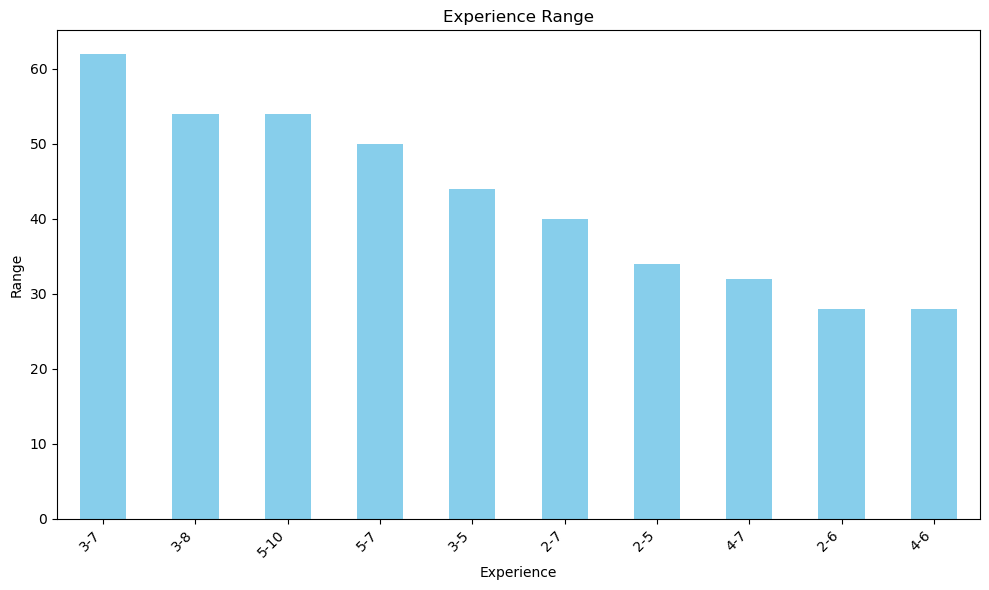

In [42]:
# plot graph for experience of job posting (top 10)
new_experience_counts=df_raw['experience'].value_counts().head(10)
plt.figure(figsize=(10, 6))
new_experience_counts.plot(kind='bar', color='skyblue')
plt.title('Experience Range')
plt.xlabel('Experience')
plt.ylabel('Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyzing Salary of Jobs


In [43]:
# count salaries in each category
salaries_counts = df_raw['salaries'].value_counts()
print(salaries_counts)

not disclosed    729
16-30              6
15-25              6
20-32.5            6
12-15              4
15-30              4
30-45              4
1-1.5              2
unpaid             2
1.75-5             2
45-80              2
18-25              2
40-70              2
10-12              2
6-15               2
5-15               2
4.5-6.5            2
12-22              2
13-20              2
8-18               2
25-35              2
9-12               2
8.5-18             2
7-15               2
8-14               2
25-40              2
10-20              1
Name: salaries, dtype: int64


In [44]:
# Calculate the counts of each salary category
salaries_counts = df_raw['salaries'].value_counts()

# Calculate the total number of entries
total_salaries = len(df_raw['salaries'])

# Calculate the percentage of each salary category
salaries_percentages = (salaries_counts / total_salaries) * 100

print("Salary Categories and their Percentages:")
print(salaries_percentages)

Salary Categories and their Percentages:
not disclosed    91.353383
16-30             0.751880
15-25             0.751880
20-32.5           0.751880
12-15             0.501253
15-30             0.501253
30-45             0.501253
1-1.5             0.250627
unpaid            0.250627
1.75-5            0.250627
45-80             0.250627
18-25             0.250627
40-70             0.250627
10-12             0.250627
6-15              0.250627
5-15              0.250627
4.5-6.5           0.250627
12-22             0.250627
13-20             0.250627
8-18              0.250627
25-35             0.250627
9-12              0.250627
8.5-18            0.250627
7-15              0.250627
8-14              0.250627
25-40             0.250627
10-20             0.125313
Name: salaries, dtype: float64


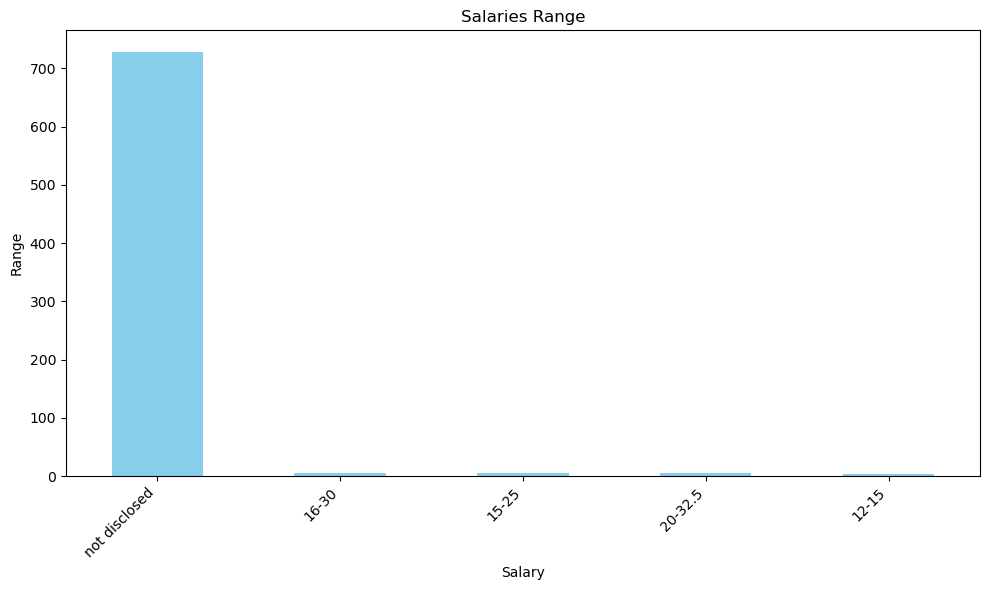

In [45]:
# plot graph for salaries of job posting (top 5)
new_salaries_counts=df_raw['salaries'].value_counts().head(5)
plt.figure(figsize=(10, 6))
new_salaries_counts.plot(kind='bar', color='skyblue')
plt.title('Salaries Range')
plt.xlabel('Salary')
plt.ylabel('Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Location of jobs

In [46]:
# Splitting the 'locations' column by comma and exploding it into multiple rows
df_raw_location = df_raw.assign(Values=df_raw['locations'].str.split(',')).explode('locations')
# Creating a new DataFrame with two columns
df_location = df_raw_location[['job_no', 'locations']]

print(df_location.head(5))

  job_no        locations
0      1        bengaluru
1      2        bengaluru
2      3        bengaluru
3      4  hybrid - mumbai
3      4         gurugram


In [47]:
df_location.head(15)


,job_no,locations
0,1,bengaluru
1,2,bengaluru
2,3,bengaluru
3,4,hybrid - mumbai
3,4,gurugram
3,4,bengaluru
4,5,bengaluru
5,6,hybrid - chennai
5,6,bengaluru
6,7,hybrid - bengaluru


In [48]:
# Print distinct values in the 'Category' column
distinct_values = df_location['locations'].unique()
for value in distinct_values:
    print(value)

bengaluru
hybrid - mumbai
 gurugram
 bengaluru
hybrid - chennai
hybrid - bengaluru
hybrid - hyderabad
 chennai
mumbai
pune(pune mumbai highway)
hyderabad
gurugram
mumbai (all areas)
pune
chennai
noida
hybrid - noida
 hyderabad/secunderabad
 bangalore/bengaluru
remote
 bangalore rural
faridabad
 delhi / ncr
maharashtra
kolkata
 mumbai
 new delhi
 hyderabad
 pune
bangalore rural
 gurgaon/ gurugram
 mumbai (all areas)
kochi
 thiruvananthapuram
pune(viman nagar)
mohali(phase 8b mohali)
hybrid - pune
kochi/cochin
 ernakulam
mumbai suburban
 navi mumbai
kalyani
mumbai (all areas)(kalina)
salem
 coimbatore
thiruvananthapuram
gandhinagar
 ahmedabad
 vadodara
panaji
 karnataka
delhi / ncr
hybrid - gurgaon/gurugram
 jamshedpur
jaipur
new delhi
nagpur


In [49]:
def replace_location(location):
    # Define patterns to match
    patterns = [
        r'\(.*\)',  # Matches anything within parentheses
        r'hybrid\s*-\s*',  # Matches "hybrid - "
        r'\bnew\s',# Matches "new "
        r'\s*', #Match space
        r'/.*$' #Match after /
    ]
    
    # Apply replacements
    for pattern in patterns:
        location = re.sub(pattern, '', location)
    return location.strip()  # Remove leading/trailing spaces

new_df_location = df_location.copy()

# Apply the function to the DataFrame
new_df_location['locations'] = df_location['locations'].apply(replace_location)
print(new_df_location)

    job_no  locations
0        1  bengaluru
1        2  bengaluru
2        3  bengaluru
3        4     mumbai
3        4   gurugram
..     ...        ...
794    397       pune
795    398     mumbai
795    398       pune
796    399      noida
797    400    chennai

[1478 rows x 2 columns]


In [50]:
# Print distinct values in the 'Category' column
distinct_values2 = new_df_location['locations'].unique()
for value in distinct_values2:
    print(value)

bengaluru
mumbai
gurugram
chennai
hyderabad
pune
noida
bangalore
remote
bangalorerural
faridabad
delhi
maharashtra
kolkata
gurgaon
kochi
thiruvananthapuram
mohali
ernakulam
mumbaisuburban
navimumbai
kalyani
salem
coimbatore
gandhinagar
ahmedabad
vadodara
panaji
karnataka
jamshedpur
jaipur
nagpur


In [51]:
def replace_location(location):
    # Define replacements using a dictionary
    replacements = {
        r'\b\w*mumbai\w*\b': 'mumbai',  # Matches any word containing "mumbai"
        r'\b\w*delhi\w*\b': 'delhi' ,    # Matches any word containing "delhi"
        r'\b\w*bangal\w*\b': 'bengaluru', # Matches any word containing "bengaluru"
        r'\b\w*noida\w*\b': 'noida'  # Matches any word containing "noida"
    } 
    
    # Apply replacements
    for pattern, replacement in replacements.items():
        location = re.sub(pattern, replacement, location)
    
    return location.strip()  # Remove leading/trailing spaces

# Apply the function to the DataFrame
new_df_location['locations'] = new_df_location['locations'].apply(replace_location)

In [52]:
# count locations in each category
location_counts = new_df_location['locations'].value_counts()
print(location_counts)

bengaluru             588
mumbai                155
hyderabad             148
chennai               147
pune                  134
delhi                  88
kolkata                74
gurugram               44
remote                 24
noida                  22
kochi                   8
coimbatore              6
thiruvananthapuram      6
gurgaon                 4
karnataka               4
maharashtra             2
mohali                  2
ernakulam               2
kalyani                 2
salem                   2
faridabad               2
gandhinagar             2
ahmedabad               2
vadodara                2
panaji                  2
jamshedpur              2
jaipur                  2
nagpur                  2
Name: locations, dtype: int64


In [53]:
# Calculate the counts of each location category
location_counts = new_df_location['locations'].value_counts()

# Calculate the total number of location
total_location = len(new_df_location['locations'])

# Calculate the percentage of each location category
location_percentages = (location_counts / total_location) * 100

print("Location Categories and their Percentages:")
print(location_percentages)

Location Categories and their Percentages:
bengaluru             39.783491
mumbai                10.487145
hyderabad             10.013532
chennai                9.945873
pune                   9.066306
delhi                  5.953992
kolkata                5.006766
gurugram               2.976996
remote                 1.623816
noida                  1.488498
kochi                  0.541272
coimbatore             0.405954
thiruvananthapuram     0.405954
gurgaon                0.270636
karnataka              0.270636
maharashtra            0.135318
mohali                 0.135318
ernakulam              0.135318
kalyani                0.135318
salem                  0.135318
faridabad              0.135318
gandhinagar            0.135318
ahmedabad              0.135318
vadodara               0.135318
panaji                 0.135318
jamshedpur             0.135318
jaipur                 0.135318
nagpur                 0.135318
Name: locations, dtype: float64


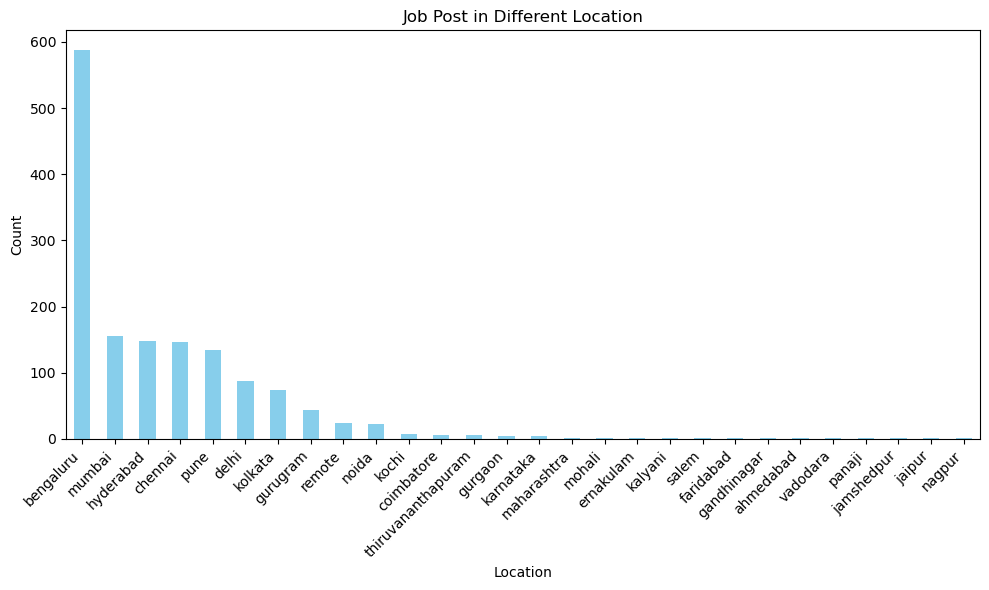

In [54]:
# plot graph for locations of job posting
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Job Post in Different Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

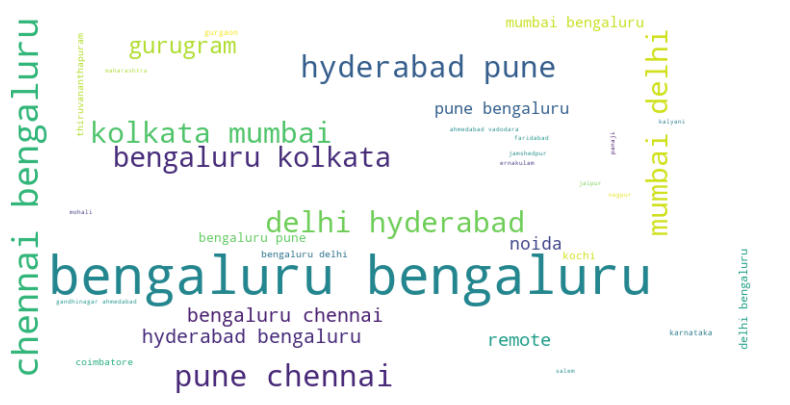

In [55]:
# Assuming df is your DataFrame containing a 'location' column
location_string = ', '.join(new_df_location['locations'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

## Skills requirement for a job

In [56]:
# Splitting the 'skills' column by comma and exploding it into multiple rows
df_raw_skills = df_raw.assign(Values=df_raw['skills'].str.split(',')).explode('skills')
# Creating a new DataFrame with two columns
df_skills = df_raw_skills[['job_no', 'skills']]

print(df_skills.head(5))

  job_no              skills
0      1       data analysis
0      1              pandas
0      1       deep learning
0      1               spark
0      1  data visualization


In [57]:
df_skills.head(15)


,job_no,skills
0,1,data analysis
0,1,pandas
0,1,deep learning
0,1,spark
0,1,data visualization
0,1,hive
0,1,pyspark
0,1,power bi
1,2,python
1,2,data analytics


In [58]:
# Print distinct values in the 'Category' column
distinct_skill = df_skills['skills'].unique()
print(distinct_skill)

['data analysis' 'pandas' 'deep learning' 'spark' 'data visualization'
 'hive' 'pyspark' 'power bi' 'python' 'data analytics'
 'artificial intelligence' 'tableau' 'ml' 'algorithms' 'data science'
 'statistical modeling' 'regression' 'predictive analytics'
 'predictive modeling' 'life sciences' 'healthcare analytics' 'healthcare'
 'automation' 'orchestration' 'service assurance' 'project management'
 'machine learning' 'agile' 'programming' 'jira' 'science' 'machine'
 'data' 'gcp' 'tensorflow' 'vertex' 'spark mllib' 'spark-core'
 'jupyter notebook' 'supply chain' 'product engineering' 'analytical'
 'data structures' 'troubleshooting' 'sql' 'computer science'
 'operations research' 'coding' 'data mining' 'analytical skills' 'french'
 'spanish' 'natural language processing' 'manager quality control'
 'object oriented programming' 'operational risk' 'wellness'
 'risk management' 'ifrs' 'stakeholder management' 'marketing mix'
 'analytics' 'marketing' 'phd' 'processing' 'process'
 'data sci

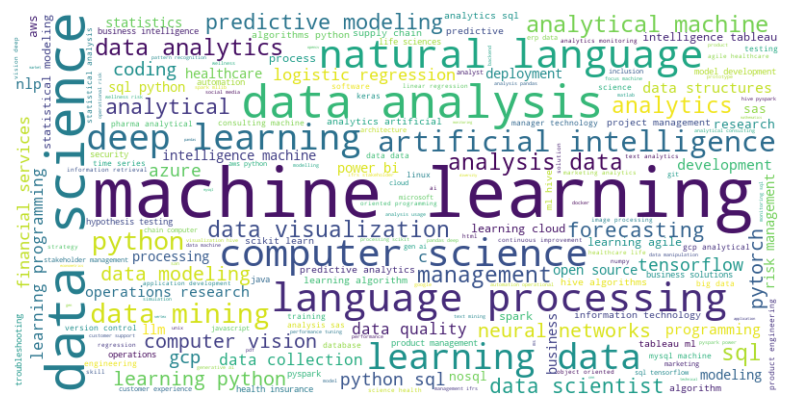

In [60]:
# Assuming df is your DataFrame containing a 'skills' column
skills_string = ', '.join(df_skills['skills'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

Conclusion:
Data Scientist Job (analyse top 20 page of naukri.com)
Bengalure and Mumbai are most prefered job location.
91.35% of job post did not disclosed salary.
Data Analytics,Pandas,Spark are most prefered skills in all posted jobs.
Experience 3-7 yrs is most likly experience range in posted jobs.

In [62]:
import os
print(os.getcwd())


C:\Users\divya
